<a href="https://colab.research.google.com/github/iskra3138/git_tutorial/blob/master/Lime_Test_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
ls

sample_data/


In [0]:
!pip install lime

     |████████████████████████████████| 276kB 9.2MB/s 
     |████████████████████████████████| 14.9MB 74.1MB/s 
  Created wheel for lime: filename=lime-0.1.1.36-cp27-none-any.whl size=284191 sha256=cc52ebceeebcd57aea0f2b99d39b677cd745dc690c3f228a2a49400e03eea6d7
  Stored in directory: /root/.cache/pip/wheels/a9/2f/25/4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
Successfully built lime
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.1+cu100 which is incompatible.
  Found existing installation: matplotlib 2.2.4
    Uninstalling matplotlib-2.2.4:
      Successfully uninstalled matplotlib-2.2.4


In [0]:
!git clone https://github.com/marcotcr/tf-models.git

Cloning into 'tf-models'...
remote: Enumerating objects: 2667, done.
remote: Total 2667 (delta 0), reused 0 (delta 0), pack-reused 2667
Receiving objects: 100% (2667/2667), 50.11 MiB | 20.30 MiB/s, done.
Resolving deltas: 100% (1186/1186), done.


In [0]:
!wget http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz

--2019-11-28 05:15:07--  http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.119.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100885009 (96M) [application/x-tar]
Saving to: ‘inception_v3_2016_08_28.tar.gz’

inception_v3_2016_0 100%[===================>]  96.21M  43.1MB/s    in 2.2s    

2019-11-28 05:15:09 (43.1 MB/s) - ‘inception_v3_2016_08_28.tar.gz’ saved [100885009/100885009]



In [0]:
!tar -xvf inception_v3_2016_08_28.tar.gz

inception_v3.ckpt


In [0]:
!wget https://www.researchgate.net/profile/Amin_Karbasi/publication/318460835/figure/fig2/AS:530639130955776@1503525635077/Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png

--2019-11-28 05:16:14--  https://www.researchgate.net/profile/Amin_Karbasi/publication/318460835/figure/fig2/AS:530639130955776@1503525635077/Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png
Resolving www.researchgate.net (www.researchgate.net)... 104.17.33.105, 104.17.32.105
Connecting to www.researchgate.net (www.researchgate.net)|104.17.33.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34701 (34K) [image/png]
Saving to: ‘Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png’

Original-image-and- 100%[===================>]  33.89K  --.-KB/s    in 0.004s  

2019-11-28 05:16:14 (8.26 MB/s) - ‘Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png’ saved [34701/34701]



In [0]:
ls

inception_v3_2016_08_28.tar.gz
inception_v3.ckpt
Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png
sample_data/
tf-models/


In [0]:
!rm inception_v3_2016_08_28.tar.gz

In [0]:
import tensorflow as tf
slim = tf.contrib.slim
import sys
sys.path.append('./tf-models/slim')
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

W1128 05:16:29.177753 140689524197248 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1128 05:16:30.879725 140689524197248 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:12: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.

/usr/local/lib/python2.7/dist-packages/matplotlib/backends/__init__.py:89: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:


Create a predict fn for inception v3, takes in a list of images and returns a matrix of prediction probabilities

In [0]:
from nets import inception
from preprocessing import inception_preprocessing

In [0]:
session = tf.Session()

In [0]:
image_size = inception.inception_v3.default_image_size
def transform_img_fn(path_list):
    out = []
    for f in path_list:
        image_raw = tf.image.decode_jpeg(open(f).read(), channels=3)
        image = inception_preprocessing.preprocess_image(image_raw, image_size, image_size, is_training=False)
        out.append(image)
    return session.run([out])[0]

In [0]:
from datasets import imagenet
names = imagenet.create_readable_names_for_imagenet_labels()

In [0]:
processed_images = tf.placeholder(tf.float32, shape=(None, 299, 299, 3))

In [0]:
import os
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, _ = inception.inception_v3(processed_images, num_classes=1001, is_training=False)
probabilities = tf.nn.softmax(logits)

checkpoints_dir = './'
init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'inception_v3.ckpt'),
    slim.get_model_variables('InceptionV3'))
init_fn(session)

W1128 05:16:44.082958 140689524197248 module_wrapper.py:139] From ./tf-models/slim/nets/inception_utils.py:54: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1128 05:16:44.084827 140689524197248 module_wrapper.py:139] From ./tf-models/slim/nets/inception_v3.py:479: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1128 05:16:44.089080 140689524197248 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1057: apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})

In [0]:
'''from google.colab import files

uploaded = files.upload()'''

'from google.colab import files\n\nuploaded = files.upload()'

W1128 05:16:50.263075 140689524197248 module_wrapper.py:139] From ./tf-models/slim/preprocessing/inception_preprocessing.py:270: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.



(223, 'kuvasz', 0.0019022955)
(239, 'Greater Swiss Mountain dog', 0.014653591)
(241, 'Appenzeller', 0.026844112)
(242, 'EntleBucher', 0.036868405)
(240, 'Bernese mountain dog', 0.70684594)


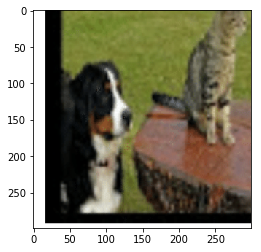

In [0]:

#images = transform_img_fn(['./dogs.png'])
images = transform_img_fn(['./Original-image-and-visualization-of-the-superpixels-selected-by-the-three-algorithms-to.png'])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = predict_fn(images)
for x in preds.argsort()[0][-5:]:
    print (x, names[x], preds[0,x])

In [0]:
image = images[0]

In [0]:
## Now let's get an explanation

In [0]:
from lime import lime_image
import time

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
tmp = time.time()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)
print time.time() - tmp

11.5546119213


Now let's see the explanation for the top class (Bernese mountain dog)

We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden

In [0]:
from skimage.segmentation import mark_boundaries

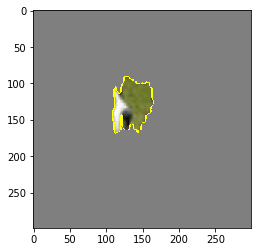

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

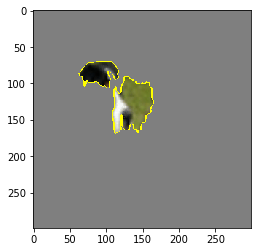

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=2, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

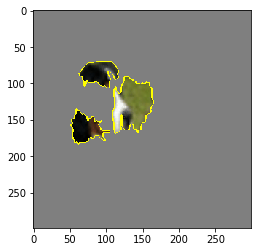

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=3, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

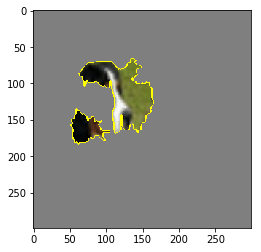

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=4, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

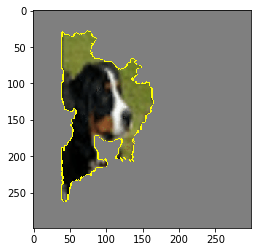

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

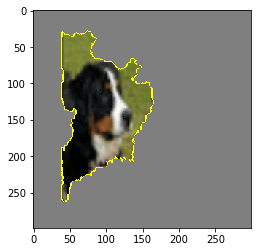

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=11, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

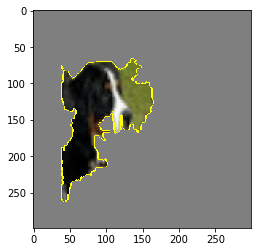

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=7, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

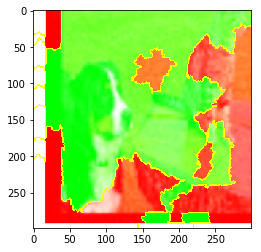

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=False, num_features=10000, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

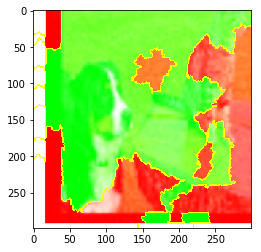

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

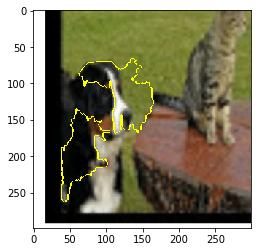

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

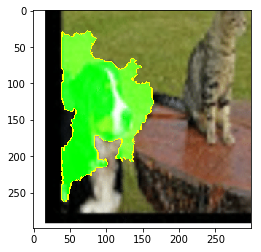

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

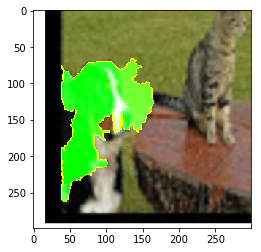

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

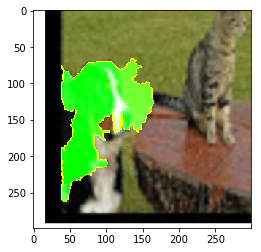

In [0]:
temp, mask = explanation.get_image_and_mask(240, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Let's see the explanation for Egyptian cat

Most positive towards egyptian cat:

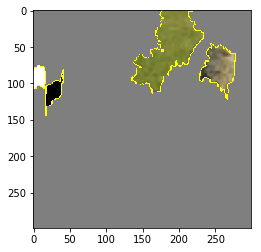

In [0]:
temp, mask = explanation.get_image_and_mask(223, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Pros and cons:

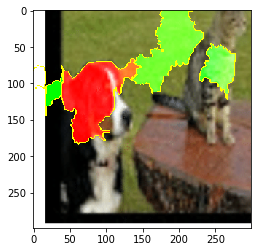

In [0]:
temp, mask = explanation.get_image_and_mask(223, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))